### Exploratory data analysis

##### Una empresa de e-commerce llamada Benvindo, localizada en Brasil te ha compartido sus datos. A la Gerencia General le interesa conocer más sobre sus operaciones comerciales. Quieren conocer más sobre sus productos y sus clientes para poder tomar decisiones con respecto a sus líneas de productos. 


In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_items = pd.read_csv('files/olist_order_items_dataset.csv')
df_payments = pd.read_csv('files/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('files/olist_order_reviews_dataset.csv')
df_dataset = pd.read_csv('files/olist_orders_dataset.csv')
df_product_dataset = pd.read_csv('files/olist_products_dataset.csv')
df_product_category = pd.read_csv('files/product_category_name_translation.csv')

In [5]:
df_items.head() #information about items, shipping date, price, freight value, id, etc.

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_payments.head() # information about payments, kind of payment, amounts, payment installments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_reviews.head() # information about comments from customers, review score, dates, etc.

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
df_dataset.head() # this looks like the main table. It has the id of customer and orders, status, dates, etc.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_product_dataset.head() # information about products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
#print the row where the product_category_name is equal to "perfumaria"
print(df_product_category[df_product_category['product_category_name'] == 'perfumaria'])

  product_category_name product_category_name_english
6            perfumaria                     perfumery


#### detailed sales information

In [12]:
df_dataset.info()
# 8 columns
# 99441 rows
# order_approved_at, order_delivered_carrier_date, order_delivered_customer_date have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
df_dataset.describe().T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


#### Count of purchases by month

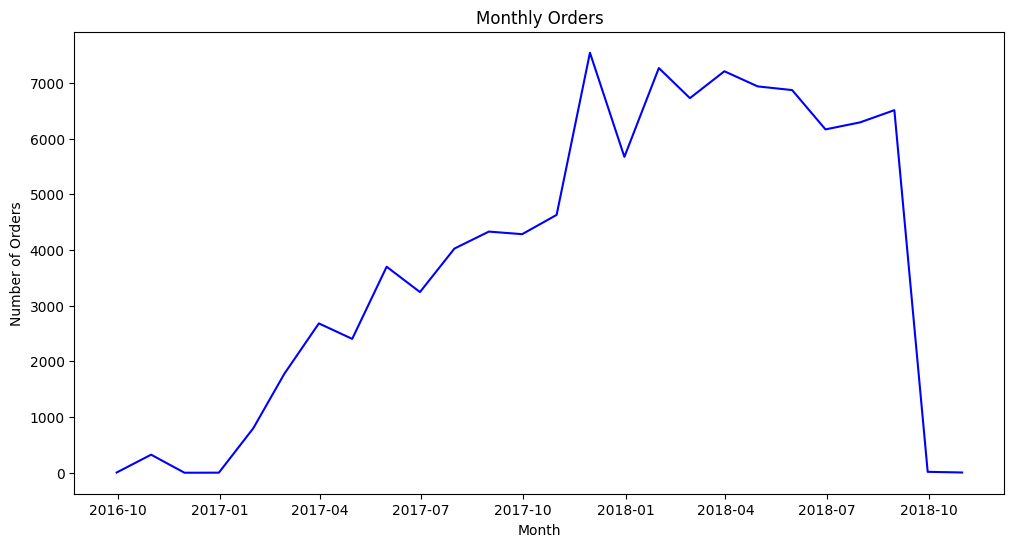

In [27]:
df_dataset['order_purchase_timestamp'] = pd.to_datetime(df_dataset['order_purchase_timestamp'])
monthly_orders = df_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).count()['order_id']

plt.figure(figsize=(12,6))

plt.plot(monthly_orders.index, monthly_orders.values, color='blue')
plt.xlabel('Months')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

plt.show()


##### Estimated delivery date

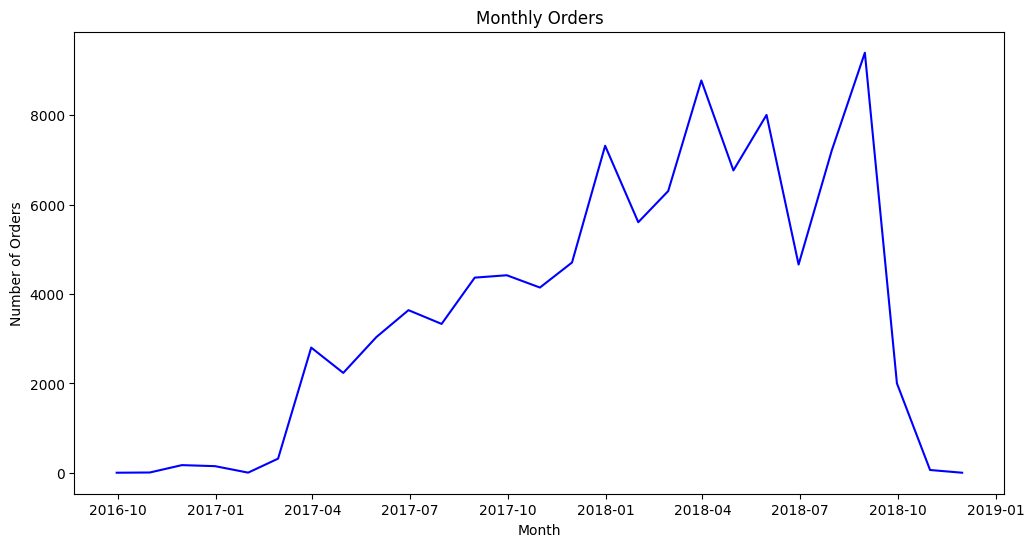

In [28]:
df_dataset['order_estimated_delivery_date'] = pd.to_datetime(df_dataset['order_estimated_delivery_date'])
monthly_orders = df_dataset.groupby(pd.Grouper(key='order_estimated_delivery_date', freq='M')).count()['order_id']

plt.figure(figsize=(12,6))

plt.plot(monthly_orders.index, monthly_orders.values, color='blue')
plt.xlabel('Months')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

plt.show()

##### ADD the category to the main table

In [41]:
# create a dataframe with the order_id and product_id 
df_items2 = df_items[['order_id', 'product_id']]
# merge the dataframe with the dataset by order_id
df_dataset_category = df_dataset.merge(df_items2, how='left', on='order_id')

# create a dataframe with the product_id and product_category_name
df_product_dataset2 = df_product_dataset[['product_id', 'product_category_name']]

# merge the dataframe with the dataset by product_id to add the name of the product_category
df_dataset_category = df_dataset_category.merge(df_product_dataset2, how='left', on='product_id')
df_dataset_category.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,papelaria


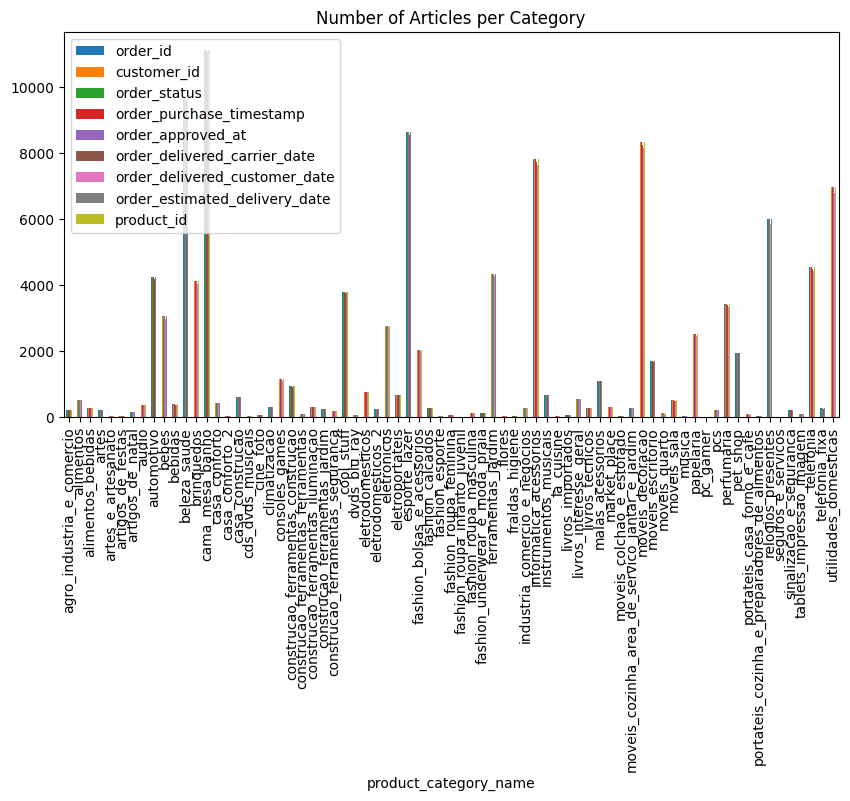

In [46]:
df_dataset_category.groupby('product_category_name').count().plot(kind='bar', figsize=(10, 5), title='Number of Articles per Category')
plt.show()


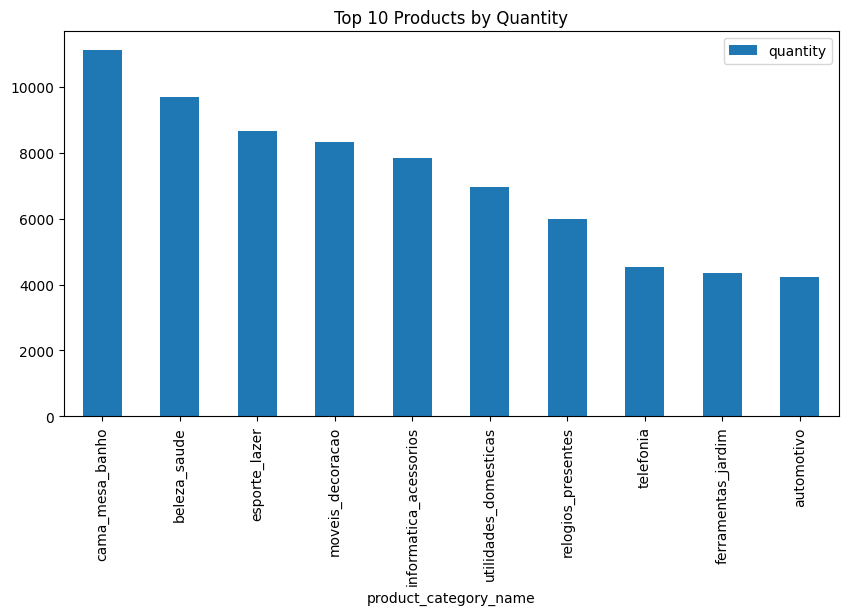

In [48]:
# first 10 products

# Group by product name and count the number of occurrences
df_product_count = df_dataset_category.groupby('product_category_name')['order_id'].count().reset_index(name='quantity')
# Sort by quantity and select the top 10
df_top_products = df_product_count.sort_values('quantity', ascending=False).head(10)
# Plot a bar chart of the top products
df_top_products.plot(kind='bar', x='product_category_name', y='quantity', figsize=(10, 5), title='Top 10 Products by Quantity')
plt.show()
